# Handling Missing Data 

- In real datasets, some values are often missing. If we don’t handle them properly, they can affect analysis and machine learning models.

- There are two basic ways to handle missing data:

1. Remove Missing Values

We delete rows or columns that have missing data.
Used when missing values are very few.

2. Impute Missing Values

- We fill missing values with some value instead of deleting them.

#### Simple Imputation:
- Mean, median (for numbers) or mode (for categories)

#### KNN Imputation:
- Uses nearest data points to fill missing values

#### Iterative Imputation (MICE):
- Predicts missing values using other features

#### Missing Indicator:
- Adds a new column to mark missing values

- Handling missing data helps keep data quality and model performance better.

# Complete Case Analysis (CCA) – Simple Description

- Complete Case Analysis (CCA) is a method where we remove all rows that contain any missing values and use only the complete data for analysis or modeling.

- It is easy to apply and works well when the number of missing values is very small and random.
- However, it can reduce data size and may cause bias if missing data is not random.

In [ ]:
## CCA should be used when the data is missing at random or the missing data is very small.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [7]:
df.isnull().mean()*100    #it gives the percentage


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
df.shape

(19158, 13)

In [9]:
## we will remove columns where null value is less than 5% and greater than 0
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() >0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1021,0.920,no_enrollment,Graduate,19.0,57.0
7983,0.920,no_enrollment,Graduate,20.0,6.0
6092,0.804,no_enrollment,Graduate,5.0,155.0
5729,0.698,no_enrollment,Graduate,7.0,47.0
7689,0.624,no_enrollment,Graduate,4.0,45.0


In [11]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [12]:
len(df[cols].dropna()) / len(df)


0.8968577095730244

In [14]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

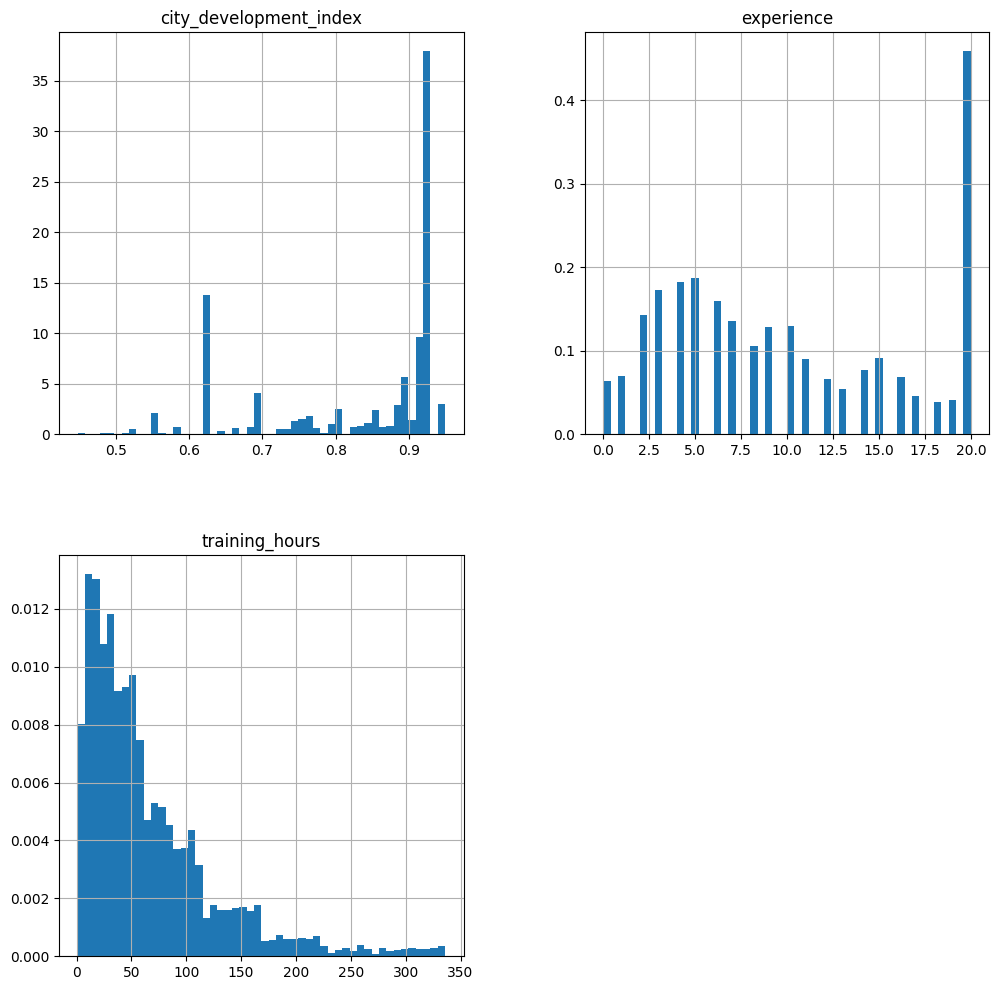

In [16]:
new_df.hist(bins = 50, density = True , figsize = (12,12))
plt.show()

<Axes: ylabel='Density'>

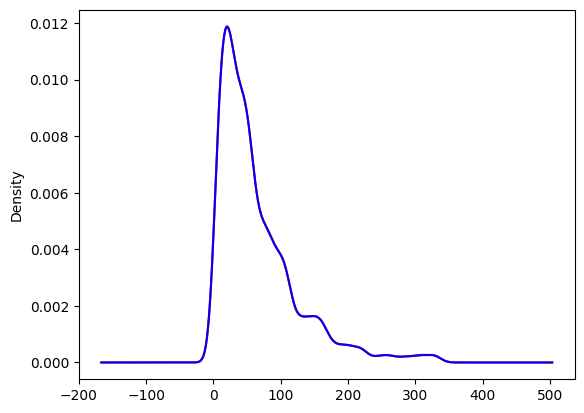

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['training_hours'].plot.density(color = 'red')

# Data after CCA
new_df['training_hours'].plot.density(color = 'blue')

<Axes: >

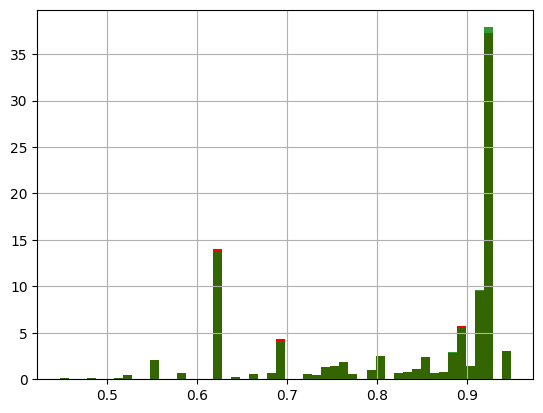

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

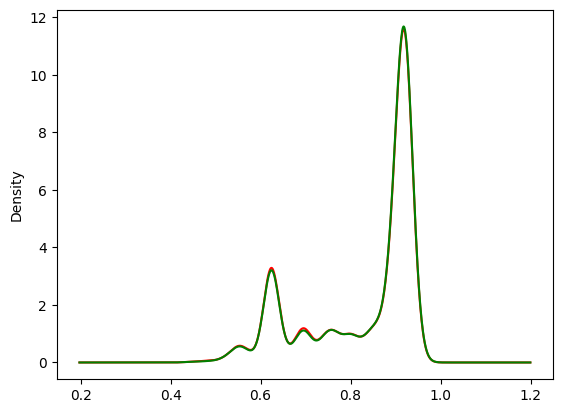

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')


<Axes: >

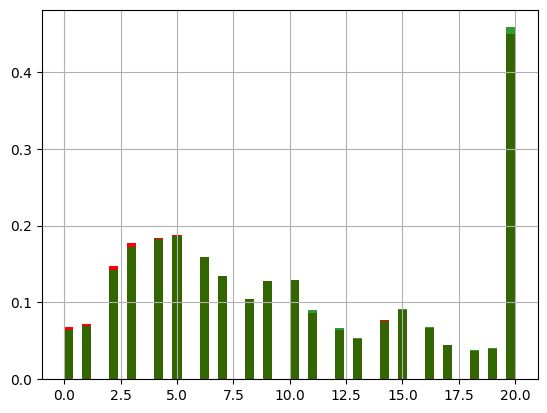

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


<Axes: ylabel='Density'>

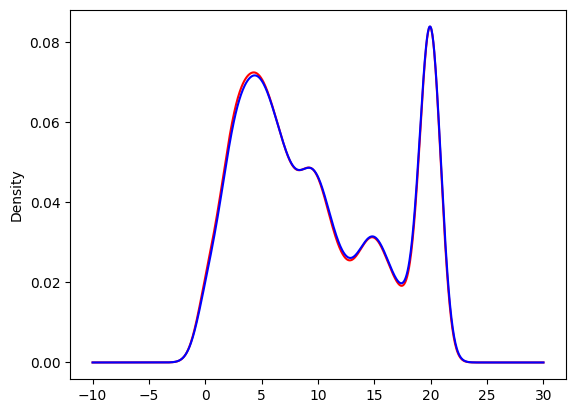

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original data
df['experience'].plot.density(color = 'red')

# Data after CCA
new_df['experience'].plot.density(color = 'blue')

In [23]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [24]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp


,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
